<a href="https://colab.research.google.com/github/Ruthra03/Sine-interpolation/blob/main/Linear_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def generate_angles(num_points):
    return np.linspace(0, np.pi/2, num_points) # Generate angles

In [3]:
def calculate_sin(angles):
    return np.sin(angles)

In [4]:
def slope_of_line(x1, x2, y1, y2):
    return (y2 - y1) / (x2 - x1)

def error_point(x1, x2, m_line): # Find the point x where cos(x) = slope of the line
    def equation(x):
        return np.cos(x) - m_line
    return opt.root_scalar(equation, bracket=[x1, x2]).root

def interpolation_error(angles, sin_values):
    errors = []
    max_error = 0
    for i in range(len(angles) - 1):
        x1, x2 = angles[i], angles[i + 1]
        y1, y2 = sin_values[i], sin_values[i + 1]

        m_line = slope_of_line(x1, x2, y1, y2) # Slope on the straight line

        critical_point = error_point(x1, x2, m_line) # Find the point where slope of the line and slope of the sin(x) are equal

        interpolated_value = y1 + (y2 - y1) / (x2 - x1) * (critical_point - x1) # Interpolated value at the critical point

        actual_value = np.sin(critical_point) # Actual sin(x) value at the critical point

        error = np.abs(actual_value - interpolated_value)  # Calculate the error
        if error > max_error:
            max_error = error

        errors.append(error)
    errors.append(0)

    return max_error, np.array(errors)

In [5]:
def sin_linear_interpolation(tolerance, max_iterations=100):
    num_points = 10
    angles = generate_angles(num_points) # Generate initial angles
    y = calculate_sin(angles) # Calculate sin values

    for iteration in range(max_iterations):
        angles = generate_angles(num_points)
        sin_values = calculate_sin(angles)
        max_error, errors = interpolation_error(angles, sin_values) # Calculate the errror

        error_ratio = max_error / tolerance

        if error_ratio > 1: # If the error ratio greater than 1 - increase the num_points
            num_points = int(num_points * (1 + error_ratio))
        elif error_ratio < 0.5:
            num_points = max(10, int(num_points * (0.5 + error_ratio)))
        else:
            break

    return angles, sin_values, num_points

In [10]:
def refine_angles(angles, sin_values, tolerance):
    new_angles = np.copy(angles)  # Create a copy of theta to modify
    new_sine = np.copy(sin_values)          # Copy y as well for calculations

    i = 1
    while i < len(new_angles) - 1:  # Iterate over all points except the first and last
        temp_angles = np.delete(new_angles, i)
        temp_sine = np.sin(temp_angles)

        max_error, errors = interpolation_error(temp_angles, temp_sine) # Interpolation error for the modified theta

        if max_error <= tolerance: # If the max error is within tolerance, remove the point permanently
            new_angles = temp_angles
            new_sine = temp_sine
        else: # If the error exceeds tolerance, move to the next point
            i += 1

    return new_angles, new_sine

In [38]:
tolerance = 0.001
final_angles, final_sine, final_num_points = sin_linear_interpolation(tolerance)
final_angles, final_sine

(array([0.        , 0.06544985, 0.13089969, 0.19634954, 0.26179939,
        0.32724923, 0.39269908, 0.45814893, 0.52359878, 0.58904862,
        0.65449847, 0.71994832, 0.78539816, 0.85084801, 0.91629786,
        0.9817477 , 1.04719755, 1.1126474 , 1.17809725, 1.24354709,
        1.30899694, 1.37444679, 1.43989663, 1.50534648, 1.57079633]),
 array([0.        , 0.06540313, 0.13052619, 0.19509032, 0.25881905,
        0.32143947, 0.38268343, 0.44228869, 0.5       , 0.55557023,
        0.60876143, 0.65934582, 0.70710678, 0.75183981, 0.79335334,
        0.83146961, 0.8660254 , 0.89687274, 0.92387953, 0.94693013,
        0.96592583, 0.98078528, 0.99144486, 0.99785892, 1.        ]))

In [39]:
new_angles = generate_angles(final_num_points)
new_sine = calculate_sin(new_angles)

In [40]:
refined_angles, refined_sine = refine_angles(new_angles, new_sine, tolerance)
refined_angles, refined_sine

(array([0.        , 0.19634954, 0.32724923, 0.45814893, 0.52359878,
        0.58904862, 0.65449847, 0.71994832, 0.78539816, 0.85084801,
        0.91629786, 0.9817477 , 1.04719755, 1.1126474 , 1.17809725,
        1.24354709, 1.30899694, 1.37444679, 1.43989663, 1.50534648,
        1.57079633]),
 array([0.        , 0.19509032, 0.32143947, 0.44228869, 0.5       ,
        0.55557023, 0.60876143, 0.65934582, 0.70710678, 0.75183981,
        0.79335334, 0.83146961, 0.8660254 , 0.89687274, 0.92387953,
        0.94693013, 0.96592583, 0.98078528, 0.99144486, 0.99785892,
        1.        ]))

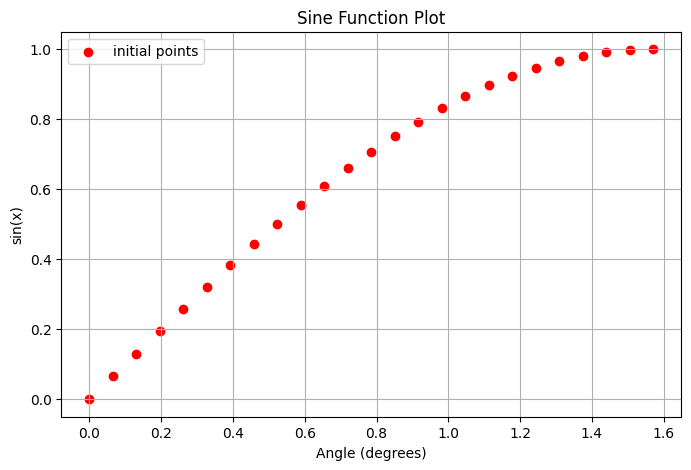

In [41]:
# Plot the angles vs sin(angles)
plt.figure(figsize=(8, 5))
plt.scatter(final_angles, final_sine, color = 'red', label='initial points')

# Add labels and title
plt.title('Sine Function Plot')
plt.xlabel('Angle (degrees)')
plt.ylabel('sin(x)')

plt.grid(True)
plt.legend()

# Display the plot
plt.show()

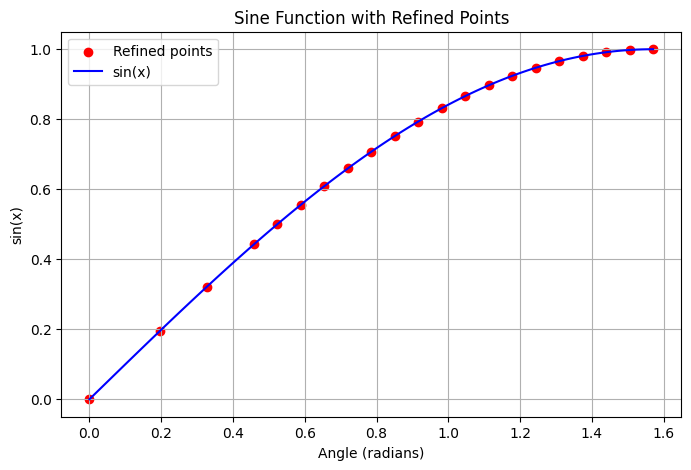

In [42]:
# Plot the angles vs sin(angles)
plt.figure(figsize=(8, 5))

plt.scatter(refined_angles, refined_sine, color='red', label='Refined points') # Plot the refined points as a scatter plot

# Generate sine wave
angles = np.linspace(0, np.pi / 2, 100)  # From 0 to 90 degrees in radians
sin_values = np.sin(angles)

# Plot the sine wave
plt.plot(angles, sin_values, color='blue', label='sin(x)')

# Add labels and title
plt.title('Sine Function with Refined Points')
plt.xlabel('Angle (radians)')
plt.ylabel('sin(x)')

# Add a grid for better readability
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


In [43]:
def create_table(angles, y_values):
    return np.column_stack((angles, y_values))
refined_table = create_table(refined_angles, refined_sine)
initial_table = create_table(final_angles, final_sine)

In [44]:
refined_table

array([[0.        , 0.        ],
       [0.19634954, 0.19509032],
       [0.32724923, 0.32143947],
       [0.45814893, 0.44228869],
       [0.52359878, 0.5       ],
       [0.58904862, 0.55557023],
       [0.65449847, 0.60876143],
       [0.71994832, 0.65934582],
       [0.78539816, 0.70710678],
       [0.85084801, 0.75183981],
       [0.91629786, 0.79335334],
       [0.9817477 , 0.83146961],
       [1.04719755, 0.8660254 ],
       [1.1126474 , 0.89687274],
       [1.17809725, 0.92387953],
       [1.24354709, 0.94693013],
       [1.30899694, 0.96592583],
       [1.37444679, 0.98078528],
       [1.43989663, 0.99144486],
       [1.50534648, 0.99785892],
       [1.57079633, 1.        ]])

In [57]:

def predict_sine(angle_degrees):
    angle_radians = np.radians(angle_degrees) # Convert angle to radians

    for i in range(len(refined_table) - 1): # Get the index of the range
        if refined_table[i, 0] <= angle_radians <= refined_table[i + 1, 0]:
            x1, y1 = refined_table[i]
            x2, y2 = refined_table[i + 1]

            sine_value = y1 + (y2 - y1) * (angle_radians - x1) / (x2 - x1) # Predict using linear interpolation
            return sine_value

random_angles = np.random.uniform(0, 90, size=100)

predicted_sine_values = np.array([predict_sine(angle) for angle in random_angles]) # Predict sine values using linear interpolation

actual_sine_values = np.sin(np.radians(random_angles)) # Calculate actual sine value

errors = np.abs(predicted_sine_values - actual_sine_values) # Calculate error

pd.set_option('display.max_rows', 150)
df = pd.DataFrame({
    'Angle (degrees)': random_angles,
    'Predicted sine': predicted_sine_values,
    'Actual sine': actual_sine_values,
    'Error': errors,
    'Within Tolerance': errors <= tolerance
})

df

,Angle (degrees),Predicted sine,Actual sine,Error,Within Tolerance
0,64.495561,0.902242,0.902552,0.000310,True
1,8.500129,0.147404,0.147812,0.000408,True
2,16.303985,0.280233,0.280733,0.000501,True
3,35.369493,0.578542,0.578847,0.000305,True
4,80.690799,0.986302,0.986830,0.000528,True
5,46.419735,0.724043,0.724409,0.000367,True
6,73.474087,0.958196,0.958691,0.000495,True
7,39.593526,0.637001,0.637337,0.000336,True
8,7.111354,0.123321,0.123798,0.000478,True
9,62.606310,0.887465,0.887866,0.000401,True


Angle: 355.14 degrees, Predicted sine: -0.084204
Angle: -341.35 degrees, Predicted sine: 0.319721
Angle: 8.95 degrees, Predicted sine: 0.155191
Angle: 62.98 degrees, Predicted sine: 0.890546
Angle: 79.26 degrees, Predicted sine: 0.982242
Angle: 282.85 degrees, Predicted sine: -0.974431
Angle: 179.57 degrees, Predicted sine: 0.007443
Angle: 185.52 degrees, Predicted sine: -0.095809
Angle: -56.72 degrees, Predicted sine: -0.835843
Angle: 182.66 degrees, Predicted sine: -0.046160


In [60]:
def linear_interpolation(x, x0, y0, x1, y1):
    return y0 + (y1 - y0) * (x - x0) / (x1 - x0)

def predict_sine(angle_degrees):
    # Handle negative angles by using a flag
    negative = False
    if angle_degrees < 0:
        angle_degrees = abs(angle_degrees)
        negative = True

    angle_degrees = angle_degrees % 360

    if 0 <= angle_degrees <= 90: # Adjust angle for different quadrants
        sine_value = calculate_sine_from_lookup(angle_degrees)
    elif 90 < angle_degrees <= 180:
        sine_value = calculate_sine_from_lookup(180 - angle_degrees)
    elif 180 < angle_degrees <= 270:
        sine_value = -calculate_sine_from_lookup(angle_degrees - 180)
    elif 270 < angle_degrees < 360:
        sine_value = -calculate_sine_from_lookup(360 - angle_degrees)

    if negative:
        sine_value = -sine_value

    return sine_value

def calculate_sine_from_lookup(angle_degrees):
    angle_radians = np.radians(angle_degrees)

    for i in range(len(refined_table) - 1): # Find the range of the lookup table where the angle lies
        if refined_table[i, 0] <= angle_radians <= refined_table[i + 1, 0]:
            x1, y1 = refined_table[i]
            x2, y2 = refined_table[i + 1]

            return linear_interpolation(angle_radians, x1, y1, x2, y2) # Calculate sine using linear interpolation

angles = np.random.uniform(-360, 360, 100)  # Generate 100 random angles between -360 and 360

predicted_sines = np.array([predict_sine(angle) for angle in angles]) # Predict sine values

actual_sines = np.sin(np.radians(angles)) # Calculate actual sine values

errors = np.abs(predicted_sines - actual_sines) # Calculate error

# Convert results into a pandas DataFrame for better readability
data = {
    "Angle (degrees)": angles,
    "Predicted sine": predicted_sines,
    "Actual sine": actual_sines,
    "Error": errors,
    "Within Tolerance": errors <= tolerance
}
df = pd.DataFrame(data)

print(df)

    Angle (degrees)  Predicted sine  Actual sine     Error  Within Tolerance
0       -356.278452        0.064537     0.064908  0.000371              True
1         67.603505        0.924516     0.924569  0.000054              True
2        201.454684       -0.365021    -0.365765  0.000745              True
3        -82.956753       -0.992226    -0.992454  0.000228              True
4        170.475278        0.165172     0.165473  0.000302              True
5         65.511671        0.909560     0.910046  0.000486              True
6        224.325501       -0.698516    -0.698734  0.000218              True
7        264.542220       -0.994938    -0.995467  0.000529              True
8        206.280726       -0.442762    -0.442770  0.000008              True
9        352.276545       -0.133935    -0.134392  0.000457              True
10       356.764625       -0.056106    -0.056438  0.000332              True
11        -8.372608       -0.145192    -0.145610  0.000418              True